<a href="https://colab.research.google.com/github/kSahatova/AA2024/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting price of games

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import Sequence
import random
import math

In [ ]:
random.seed(45)

In [ ]:
import pandas as pd

games_df = pd.read_json("dataset.json")

games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14687 entries, 0 to 14686
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   appid        14687 non-null  object 
 1   release      14687 non-null  object 
 2   title        14687 non-null  object 
 3   price        14687 non-null  int64  
 4   sentiment    6904 non-null   object 
 5   reviews      6904 non-null   float64
 6   percentage   6904 non-null   float64
 7   tags         14687 non-null  object 
 8   screenshots  14687 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.0+ MB


In [ ]:
games_df

,appid,release,title,price,sentiment,reviews,percentage,tags,screenshots
0,2805630,2024-02-24,BotMobile,1173,Positive,10.0,100.0,"[Action, Action-Adventure, Adventure, Casual, ...",[2805630_ss_02b69bffacf19807fb6202fb8167fad7e0...
1,2805610,2024-02-24,Just skill shooter 3: 2d edition,199,Positive,11.0,90.0,"[2D, Action, Action RPG, Action-Adventure, Adv...",[2805610_ss_21f5dfd4d369f1cefdd9d233f574a4758d...
2,2816420,2024-02-24,Slime Drop,199,None,NaN,NaN,"[2D, Arcade, Casual, Clicker, Colorful, Cute, ...",[2816420_ss_649a6c5bb66b93bf7b0a384d412923618d...
3,2815670,2024-02-24,Path to the Creator,299,None,NaN,NaN,"[2D, Action RPG, Adventure, Character Customiz...",[2815670_ss_06c8a39fd0618390bdedaff037f2463ca4...
4,2776190,2024-02-24,Crowd Control VR,1179,None,NaN,NaN,"[360 Video, Arcade, Cartoony, Casual, Fantasy,...",[2776190_ss_01d6152f8e559e051312ea5e6232ba1ecb...
...,...,...,...,...,...,...,...,...,...
14682,2180890,2024-03-11,Bunny Game,498,None,NaN,NaN,"[3D, Action, Action-Adventure, Adventure, Casu...",[2180890_ss_65cce5286f5b640fce7205265a6d93849d...
14683,2782420,2024-03-11,Minimal Escape,589,None,NaN,NaN,"[2.5D, 2D, 2D Platformer, Adventure, Dark, Dar...",[2782420_ss_12214ad1e860f85e92db7a5a1bce3704e2...
14684,2836310,2024-03-11,Refrega,779,None,NaN,NaN,"[2D, Action, Action RTS, Action-Adventure, Bas...",[2836310_ss_44ad679065acaf830ac65462dc8680f694...
14685,2626240,2024-03-11,Saving Mrs. Hinako,1479,None,NaN,NaN,"[2D, Adventure, Anime, Casual, Colorful, Conve...",[2626240_ss_45a46df5dafe7c83e2094b47d6d3e2ac7d...


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(games_df, test_size=0.2)
train, val = train_test_split(train,test_size=0.2)


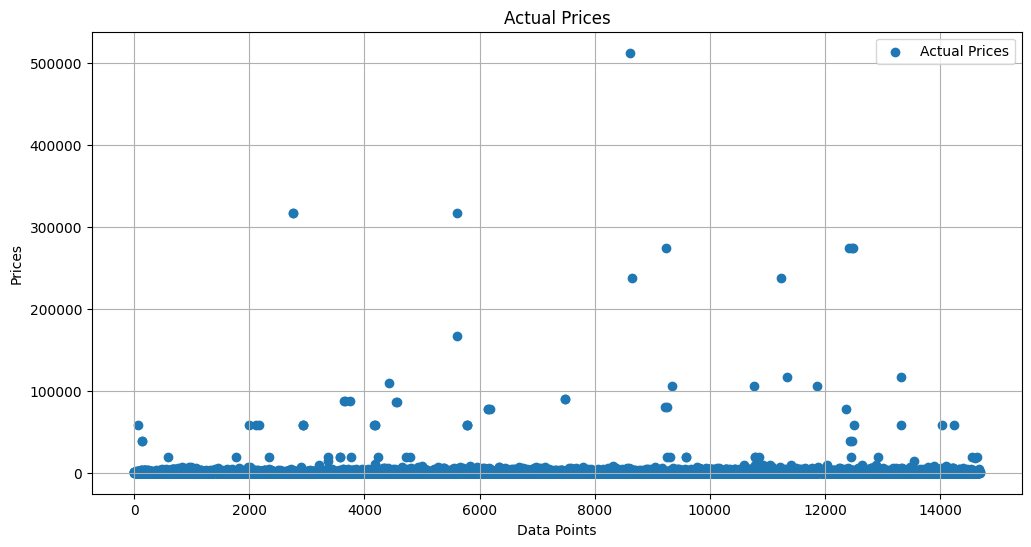

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'actual_prices' is a list or array containing the actual prices
plt.figure(figsize=(12, 6))
plt.scatter(range(len(games_df['price'])), games_df['price'], label="Actual Prices")

plt.title("Actual Prices")
plt.xlabel("Data Points")
plt.ylabel("Prices")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Assuming train is your DataFrame

# Step 1: Compute Q1 and Q3
Q1 = train['price'].quantile(0.25)
Q3 = 100000

# Step 2: Compute IQR
IQR = Q3 - Q1

# Step 3: Set limits based on IQR
lower_limit = Q1 - 1.5 * IQR
upper_limit = 10000

# Step 4: Remove outliers
train_no_outliers = train[(train['price'] > lower_limit) & (train['price'] < upper_limit)]


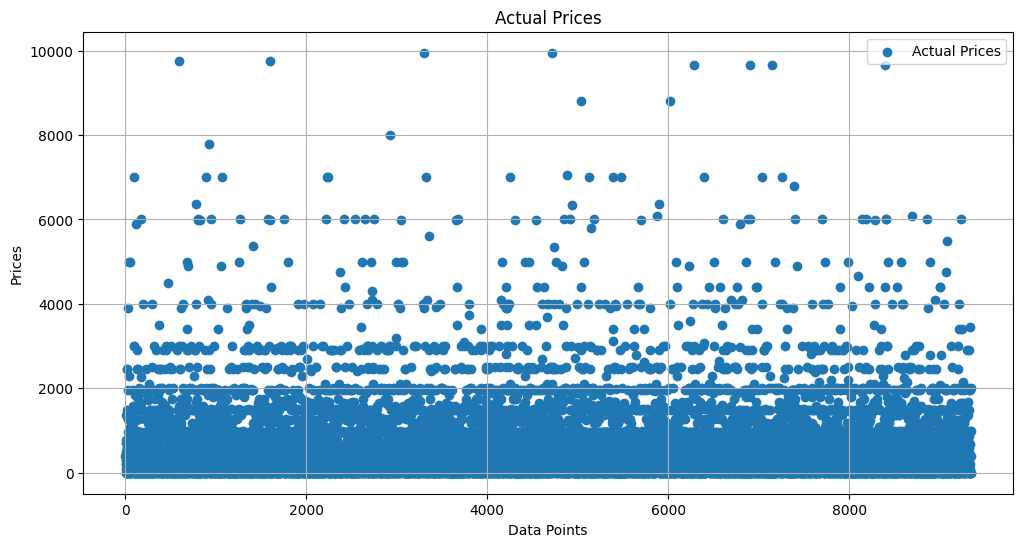

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'actual_prices' is a list or array containing the actual prices
plt.figure(figsize=(12, 6))
plt.scatter(range(len(train_no_outliers['price'])), train_no_outliers['price'], label="Actual Prices")

plt.title("Actual Prices")
plt.xlabel("Data Points")
plt.ylabel("Prices")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
train_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9346 entries, 10546 to 13421
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   appid        9346 non-null   object 
 1   release      9346 non-null   object 
 2   title        9346 non-null   object 
 3   price        9346 non-null   int64  
 4   sentiment    4388 non-null   object 
 5   reviews      4388 non-null   float64
 6   percentage   4388 non-null   float64
 7   tags         9346 non-null   object 
 8   screenshots  9346 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 730.2+ KB


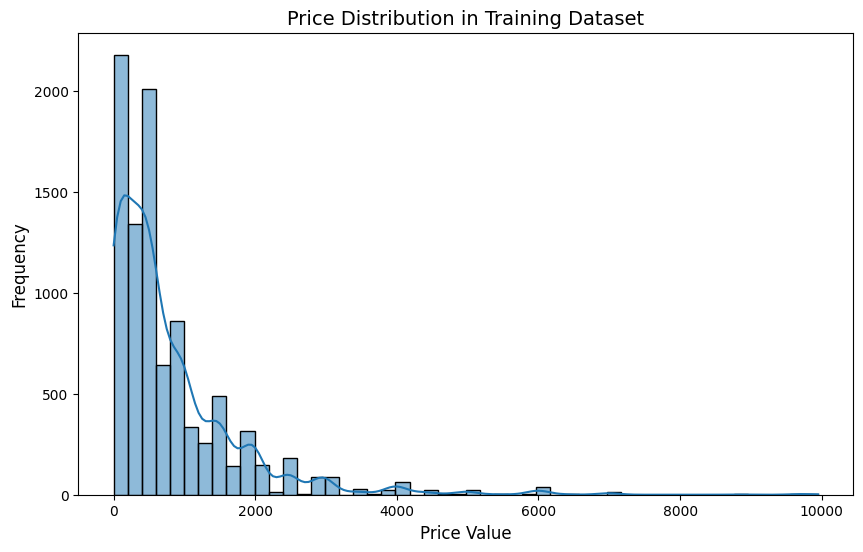

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6)) # Set figure size

sns.histplot(train_no_outliers["price"], bins=50, kde=True) # Plot histogram with 50 bins & density curve

plt.title("Price Distribution in Training Dataset", fontdict={"fontsize": 14})
plt.xlabel("Price Value", fontdict={"fontsize": 12})
plt.ylabel("Frequency", fontdict={"fontsize": 12})

plt.show()

In [ ]:
import pandas as pd

# Assuming df is your original dataframe
train_new = train_no_outliers.explode('screenshots')
indices = np.arange(len(train_new))
np.random.shuffle(indices)
train_new = train_new.iloc[indices].reset_index(drop=True)

val_new = val.explode('screenshots')
indices = np.arange(len(val_new))
np.random.shuffle(indices)
val_new = val_new.iloc[indices].reset_index(drop=True)

test_new = test.explode('screenshots')
indices = np.arange(len(test_new))
np.random.shuffle(indices)
test_new = test_new.iloc[indices].reset_index(drop=True)

train_new=train_new.reset_index()
val_new= val_new.reset_index()
test_new=test_new.reset_index()

In [ ]:
train_new

,index,appid,release,title,price,sentiment,reviews,percentage,tags,screenshots
0,0,2417580,2023-07-14,Bonnie's Bakery,399,Very Positive,67.0,95.0,"[2D, 3D, Cartoon, Colorful, Cooking, Crime, Cu...",2417580_ss_70858dd757ec8a04c7dc8b494467932ffd4...
1,1,1191660,2024-03-11,Rebel Transmute,1950,Positive,38.0,94.0,"[2D, 2D Platformer, Action, Action-Adventure, ...",1191660_ss_3c32d6a47fb68b106263f1d4fe9269accf4...
2,2,2585410,2023-09-16,Absolute Schafkopf for Windows 11,999,None,NaN,NaN,"[2D, Card Game, Casual, Family Friendly, Reali...",2585410_ss_259dc08b2ce56efcdbc961ca8b0f8b6ca6c...
3,3,2273220,2023-05-18,Axium's Box,499,None,NaN,NaN,"[3D, 3D Platformer, Action, Adventure, Atmosph...",2273220_ss_6ed3471a4d3cc97c9fa45c48c41976c3d40...
4,4,1627750,2024-02-02,O.A.C - World Begins,1950,None,NaN,NaN,"[Artificial Intelligence, Base Building, Chara...",1627750_ss_226574765f0fe5108a4eb15836575405ab1...
...,...,...,...,...,...,...,...,...,...,...
81872,81872,2193930,2023-03-16,BLOCkCORsair,399,None,NaN,NaN,"[2.5D, Action, Bullet Hell, Combat, Crafting, ...",2193930_ss_8a84f49f1d3f3d79a134cba8763f1f9ade2...
81873,81873,2404060,2024-02-09,Mr. Mookie and the Runaway Cookie,0,None,NaN,NaN,"[2D, 2D Platformer, Action, Casual, Comedy, Cu...",2404060_ss_ced94adebb4c4ef82574d47372c483861aa...
81874,81874,2094610,2023-08-14,Magocracy: Experimentation,975,None,NaN,NaN,"[6DOF, Action, Bullet Hell, Character Customiz...",2094610_ss_49b8a19031e23976fc250112779395ef2b2...
81875,81875,1296450,2023-02-16,Dust & Neon,1950,Mostly Positive,177.0,74.0,"[3D, Action, Action RPG, Action Roguelike, Atm...",1296450_ss_7e235ad56a46f05a08e1d16836d0fee2223...


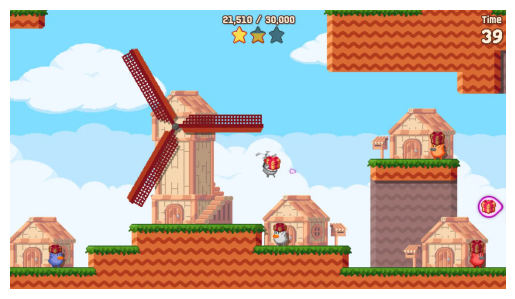

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Open the WebP image file with Pillow
image_path = "images/2080970_ss_a7b6f13ca2ae6ebca100e2b42bbcbc818429aae2.1920x1080.webp"
img = Image.open(image_path)

# Display the image using Matplotlib
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
from PIL import Image
import numpy as np

def webp_to_array(filename, target_shape=(160, 160)):
    """Converts a WebP image file to a numpy array."""
    try:
        # Attempt to open the file
        img = Image.open(filename).convert("RGB")
    except FileNotFoundError:
        print(f"Warning: Image file '{filename}' not found. Continuing without it.")
        return  # Return None to indicate that the image was not found
    except Exception as e:
        raise IOError(f"Failed to open {filename}: {str(e)}.")

    # Assert that the image was loaded properly
    assert isinstance(img, Image.Image), f"Failed to open {filename}. Please make sure the file exists and is accessible."

    # Resize the image
    img = img.resize(target_shape, resample=Image.BICUBIC)

    # Convert to a NumPy array
    img_arr = np.asarray(img)

    # Scale pixel values to [0, 1]
    img_arr = img_arr.astype(np.float32) / 255.0

    return img_arr


In [ ]:
import albumentations as A
from typing import Tuple
import tensorflow as tf
import numpy as np
from PIL import Image


def webp_generator(df, batch_size):
    num_samples = len(df)
    while True:
        batch_images = []
        batch_targets = []
        for _ in range(batch_size):
            index = np.random.randint(num_samples)
            row = df.iloc[index]
            filename = 'images/' + row['screenshots']
            target = row['price']
            try:
                arr = webp_to_array(filename, target_shape=(160, 160))
            except FileNotFoundError:
                print(f"Warning: Image file '{filename}' not found. Skipping.")
                continue  # Skip to the next iteration

            if not isinstance(arr, np.ndarray):
                print(f"Warning: Image file '{filename}' could not be loaded as a NumPy array. Skipping.")
                continue  # Skip to the next iteration

            #transformed = transform(image=arr)["image"]
            batch_images.append(arr)
            batch_targets.append(target)

        # Ensure that the batch size is correct
        if len(batch_images) < batch_size:
            continue

        yield np.array(batch_images), np.array(batch_targets)

In [ ]:
channels=3
img_height=160
img_width=160
batch_size = 8
num_epochs=50


train_ds = tf.data.Dataset.from_generator(
    lambda: webp_generator(train_new, batch_size),
    output_signature=(
        tf.TensorSpec(shape=(batch_size, img_height, img_width, channels), dtype=tf.float32),
        tf.TensorSpec(shape=(batch_size,), dtype=tf.float32)
    )
).prefetch(buffer_size=tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_generator(
    lambda: webp_generator(val_new, batch_size),
    output_signature=(
        tf.TensorSpec(shape=(batch_size, img_height, img_width, channels), dtype=tf.float32),
        tf.TensorSpec(shape=(batch_size,), dtype=tf.float32)
    )
).prefetch(buffer_size=tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_generator(
    lambda: webp_generator(test_new, batch_size),
    output_signature=(
        tf.TensorSpec(shape=(batch_size, img_height, img_width, channels), dtype=tf.float32),
        tf.TensorSpec(shape=(batch_size,), dtype=tf.float32)
    )
).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
for images, targets in train_ds:
    print('Shape of images: ', images.shape)
    print('Shape of targets: ', targets.shape)
    break

Shape of images:  (8, 160, 160, 3)
Shape of targets:  (8,)


## Simple Model

In [ ]:

inputs = tf.keras.layers.Input((img_height, img_width, channels))
x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="leaky_relu")(inputs)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="leaky_relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation="leaky_relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(rate=0.5)(x)
outputs = tf.keras.layers.Dense(units=1,activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
import tensorflow as tf

# Define exponential decay learning rate schedule
initial_learning_rate = 0.001
decay_steps = 1000
decay_rate = 0.96

learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps,
    decay_rate,
    staircase=True
)

# Create the optimizer with the dynamic learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with the specified optimizer and loss
model.compile(optimizer=optimizer, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

# Display the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 158, 158, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 79, 79, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 77, 77, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 38, 38, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 36, 36, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         5,185 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,065 (117.44 KB)

 Trainable params: 30,065 (117.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_ds, epochs=num_epochs,verbose=True,steps_per_epoch=math.ceil(len(train_new)/(batch_size)))

Epoch 1/50
    4/10242 ━━━━━━━━━━━━━━━━━━━━ 28:20 166ms/step - loss: 4732598.0000 - rmse: 2160.7681Warning: Image file 'images/2445340_ss_fdbf4004c0087b96c3a8ebb1152179b3563d7091.1920x1080.webp' not found. Continuing without it.
 2513/10242 ━━━━━━━━━━━━━━━━━━━━ 20:39 160ms/step - loss: 1115403.3750 - rmse: 1053.8235Warning: Image file 'images/1029210_ss_7096afc94036153001b266a75253fb6abdd03c54.1920x1080.webp' not found. Continuing without it.
 6844/10242 ━━━━━━━━━━━━━━━━━━━━ 9:00 159ms/step - loss: 1079586.5000 - rmse: 1038.0950Warning: Image file 'images/2445340_ss_fdbf4004c0087b96c3a8ebb1152179b3563d7091.1920x1080.webp' not found. Continuing without it.
 9101/10242 ━━━━━━━━━━━━━━━━━━━━ 3:00 158ms/step - loss: 1071718.8750 - rmse: 1034.5128Warning: Image file 'images/1029210_ss_7096afc94036153001b266a75253fb6abdd03c54.1920x1080.webp' not found. Continuing without it.
 9407/10242 ━━━━━━━━━━━━━━━━━━━━ 2:12 159ms/step - loss: 1070697.3750 - rmse: 1034.0394Warning: Image file 'images/1029

In [ ]:
Y_pred = model.predict(test_ds,steps=math.ceil(len(test_new)/batch_size))
Y_pred

3210/3210 ━━━━━━━━━━━━━━━━━━━━ 475s 148ms/step


array([[ -8.832824],
       [543.62256 ],
       [851.5758  ],
       ...,
       [638.5156  ],
       [932.91455 ],
       [999.9763  ]], dtype=float32)

In [ ]:
#Then take average per game, then remove the duplicate rows to avoid giving too much weight for games with more screenshots:
series = pd.Series(Y_pred.squeeze(), name='predicted price')
compiled_df = test_new.assign(**{series.name: series})
compiled_df["average_predicted_price"] = compiled_df.groupby("appid")["predicted price"].transform('mean')
compiled_df = compiled_df.drop_duplicates(subset="appid", keep='first')
compiled_df = compiled_df.drop(columns="predicted price")

In [ ]:
loss = np.mean((compiled_df["price"] - compiled_df["average_predicted_price"]) ** 2)
print(f"Mean Squared Error (Loss): {loss}")
rmse = np.sqrt(np.mean((compiled_df["price"] - compiled_df["average_predicted_price"]) ** 2))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (Loss): 22182273.82540762
Root Mean Squared Error (RMSE): 4709.806134588516


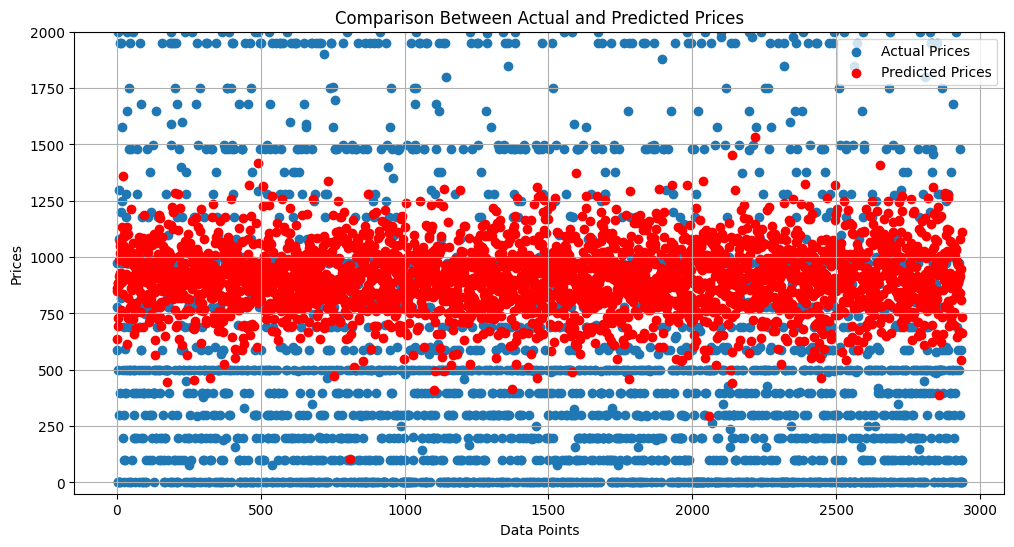

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'actual_prices' is a list or array containing the actual prices
plt.figure(figsize=(12, 6))
plt.scatter(range(len(compiled_df['price'])), compiled_df['price'], label="Actual Prices")
plt.scatter(range(len(compiled_df['average_predicted_price'])), compiled_df['average_predicted_price'], color="red", label="Predicted Prices")
plt.title("Comparison Between Actual and Predicted Prices")
plt.xlabel("Data Points")
plt.ylabel("Prices")
plt.ylim(-50,2000)
plt.legend()
plt.grid(True)
plt.show()

## More Complicated Model

In [ ]:
def make_block(inputs, num_filters):
    x = tf.keras.layers.Conv2D(num_filters, kernel_size=(3, 3), padding="same", activation="relu")(inputs)
    x = tf.keras.layers.Conv2D(num_filters, kernel_size=(3, 3), padding="same", activation="relu")(x)
    return x

inputs = tf.keras.layers.Input((img_height, img_width, channels))

x = make_block(inputs, num_filters=32)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(rate=0.2)(x)

x = make_block(x, num_filters=16)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(rate=0.3)(x)

x = tf.keras.layers.GlobalMaxPooling2D()(x)
x = tf.keras.layers.Dropout(rate=0.5)(x)

outputs = tf.keras.layers.Dense(units=1, activation="linear")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
import tensorflow as tf

# Define exponential decay learning rate schedule
initial_learning_rate = 0.001
decay_steps = 100
decay_rate = 0.96

learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps,
    decay_rate,
    staircase=True
)

# Create the optimizer with the dynamic learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule)

# Compile the model with the specified optimizer and loss
model.compile(optimizer=optimizer, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

# Display the model summary
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 160, 160, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 160, 160, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 80, 80, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 80, 80, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 40, 40, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 40, 40, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 16)             │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,105 (66.82 KB)

 Trainable params: 17,105 (66.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_ds, epochs=num_epochs,verbose=True,steps_per_epoch=math.ceil(len(train_new)/batch_size))

Epoch 1/50
 1921/10267 ━━━━━━━━━━━━━━━━━━━━ 30:25 219ms/step - loss: 1224903.7500 - rmse: 1105.8057Warning: Image file 'images/2445340_ss_fdbf4004c0087b96c3a8ebb1152179b3563d7091.1920x1080.webp' not found. Continuing without it.
10267/10267 ━━━━━━━━━━━━━━━━━━━━ 2260s 220ms/step - loss: 1153159.3750 - rmse: 1073.5564
Epoch 2/50
10267/10267 ━━━━━━━━━━━━━━━━━━━━ 2241s 218ms/step - loss: 1097471.0000 - rmse: 1047.5352
Epoch 3/50
 9670/10267 ━━━━━━━━━━━━━━━━━━━━ 2:12 221ms/step - loss: 1110043.0000 - rmse: 1053.4677Warning: Image file 'images/2445340_ss_fdbf4004c0087b96c3a8ebb1152179b3563d7091.1920x1080.webp' not found. Continuing without it.
10267/10267 ━━━━━━━━━━━━━━━━━━━━ 2269s 221ms/step - loss: 1109234.8750 - rmse: 1053.0897
Epoch 4/50
 2010/10267 ━━━━━━━━━━━━━━━━━━━━ 30:20 220ms/step - loss: 1115317.6250 - rmse: 1055.7090Warning: Image file 'images/2445340_ss_fdbf4004c0087b96c3a8ebb1152179b3563d7091.1920x1080.webp' not found. Continuing without it.
10267/10267 ━━━━━━━━━━━━━━━━━━━━ 224

In [ ]:
Y_pred = model.predict(test_ds,steps=math.ceil(len(test_new)/batch_size))
Y_pred

2568/2568 ━━━━━━━━━━━━━━━━━━━━ 372s 145ms/step


array([[580.2753 ],
       [578.9685 ],
       [581.26807],
       ...,
       [577.22296],
       [514.4666 ],
       [584.6724 ]], dtype=float32)

In [ ]:
#Then take average per game, then remove the duplicate rows to avoid giving too much weight for games with more screenshots:
series = pd.Series(Y_pred.squeeze(), name='predicted price')
compiled_df = test_new.assign(**{series.name: series})
compiled_df["average_predicted_price"] = compiled_df.groupby("appid")["predicted price"].transform('mean')
compiled_df = compiled_df.drop_duplicates(subset="appid", keep='first')
compiled_df = compiled_df.drop(columns="predicted price")

In [ ]:
loss = np.mean((compiled_df["price"] - compiled_df["average_predicted_price"]) ** 2)
print(f"Mean Squared Error (Loss): {loss}")
rmse = np.sqrt(np.mean((compiled_df["price"] - compiled_df["average_predicted_price"]) ** 2))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (Loss): 120225875.54055944
Root Mean Squared Error (RMSE): 10964.756063887578


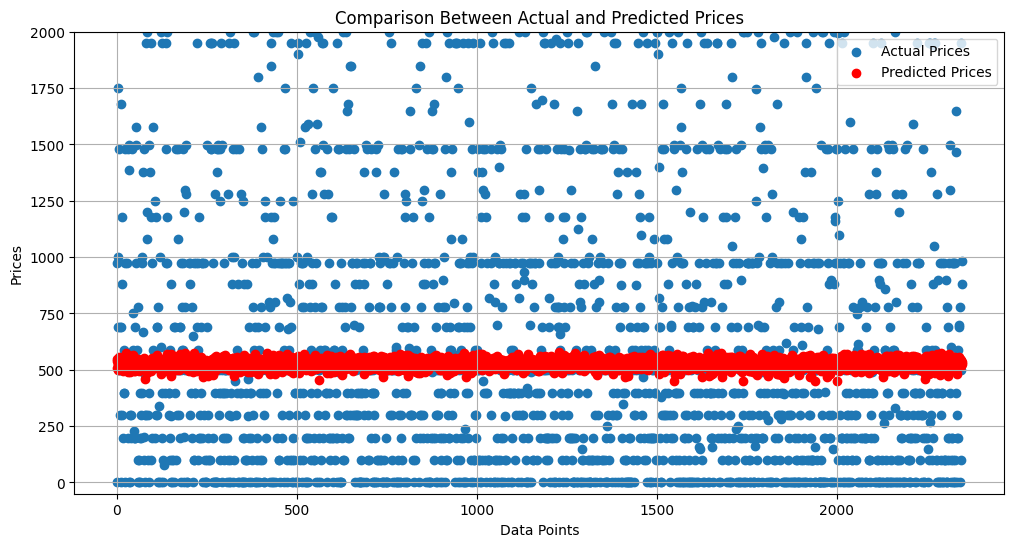

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'actual_prices' is a list or array containing the actual prices
plt.figure(figsize=(12, 6))
plt.scatter(range(len(compiled_df['price'])), compiled_df['price'], label="Actual Prices")
plt.scatter(range(len(compiled_df['average_predicted_price'])), compiled_df['average_predicted_price'], color="red", label="Predicted Prices")
plt.title("Comparison Between Actual and Predicted Prices")
plt.xlabel("Data Points")
plt.ylabel("Prices")
plt.ylim(-50,2000)
plt.legend()
plt.grid(True)
plt.show()

## Efficient Net

In [ ]:
channels=3
img_height=160
img_width=160
batch_size = 8
num_epochs=50

local_weights_file = 'efficientnetb4_notop.h5'
base_model = tf.keras.applications.EfficientNetB4(include_top=False, weights=None)
base_model.load_weights(local_weights_file)

# Freeze pre-trained layers
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(img_height, img_width, channels))
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(units=1, activation="linear")(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
import tensorflow as tf

# Define exponential decay learning rate schedule
initial_learning_rate = 0.01
decay_steps = 100
decay_rate = 0.96

learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps,
    decay_rate,
    staircase=True
)

# Create the optimizer with the dynamic learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule)

# Compile the model with the specified optimizer and loss
model.compile(optimizer=optimizer, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

# Display the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb4 (Functional)     │ (None, 5, 5, 1792)     │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1792)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,793 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,675,616 (67.43 MB)

 Trainable params: 1,793 (7.00 KB)

 Non-trainable params: 17,673,823 (67.42 MB)

In [ ]:
history = model.fit(train_ds, epochs=num_epochs,verbose=True,steps_per_epoch=math.ceil(len(train_new)/batch_size))

Epoch 1/50
 3021/10206 ━━━━━━━━━━━━━━━━━━━━ 27:02 226ms/step - loss: 1376212.7500 - rmse: 1169.3329Warning: Image file 'images/1029210_ss_ddf975e414f08a0bb419818d2cd94be4ebff6db9.1920x1080.webp' not found. Continuing without it.
 6760/10206 ━━━━━━━━━━━━━━━━━━━━ 12:56 225ms/step - loss: 1245738.6250 - rmse: 1113.1752Warning: Image file 'images/1029210_ss_ddf975e414f08a0bb419818d2cd94be4ebff6db9.1920x1080.webp' not found. Continuing without it.
10206/10206 ━━━━━━━━━━━━━━━━━━━━ 2296s 224ms/step - loss: 1198129.0000 - rmse: 1092.2028
Epoch 2/50
 2961/10206 ━━━━━━━━━━━━━━━━━━━━ 26:54 223ms/step - loss: 1077352.3750 - rmse: 1037.7023Warning: Image file 'images/1029210_ss_7096afc94036153001b266a75253fb6abdd03c54.1920x1080.webp' not found. Continuing without it.
 5052/10206 ━━━━━━━━━━━━━━━━━━━━ 19:08 223ms/step - loss: 1084634.2500 - rmse: 1041.2991Warning: Image file 'images/1029210_ss_7096afc94036153001b266a75253fb6abdd03c54.1920x1080.webp' not found. Continuing without it.
 7207/10206 ━━━━━

In [ ]:
test_ds = tf.data.Dataset.from_generator(
    lambda: webp_generator(test_new, batch_size),
    output_signature=(
        tf.TensorSpec(shape=(batch_size, img_height, img_width, channels), dtype=tf.float32),
        tf.TensorSpec(shape=(batch_size,), dtype=tf.float32)
    )
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
Y_pred = model.predict(test_ds,steps=math.ceil(len(test_new)/batch_size))
Y_pred

 767/3239 ━━━━━━━━━━━━━━━━━━━━ 9:41 235ms/stepWarning: Image file 'images/2445340_ss_fdbf4004c0087b96c3a8ebb1152179b3563d7091.1920x1080.webp' not found. Continuing without it.
 768/3239 ━━━━━━━━━━━━━━━━━━━━ 9:41 235ms/stepWarning: Image file 'images/2445340_ss_fdbf4004c0087b96c3a8ebb1152179b3563d7091.1920x1080.webp' not found. Continuing without it.
2097/3239 ━━━━━━━━━━━━━━━━━━━━ 4:30 237ms/stepWarning: Image file 'images/2445340_ss_fdbf4004c0087b96c3a8ebb1152179b3563d7091.1920x1080.webp' not found. Continuing without it.
3239/3239 ━━━━━━━━━━━━━━━━━━━━ 771s 237ms/step


array([[917.4889 ],
       [919.29364],
       [917.81586],
       ...,
       [917.67114],
       [919.23096],
       [918.6713 ]], dtype=float32)

In [ ]:
#Then take average per game, then remove the duplicate rows to avoid giving too much weight for games with more screenshots:
series = pd.Series(Y_pred.squeeze(), name='predicted price')
compiled_df = test_new.assign(**{series.name: series})
compiled_df["average_predicted_price"] = compiled_df.groupby("appid")["predicted price"].transform('mean')
compiled_df = compiled_df.drop_duplicates(subset="appid", keep='first')
compiled_df = compiled_df.drop(columns="predicted price")

In [ ]:
loss = np.mean((compiled_df["price"] - compiled_df["average_predicted_price"]) ** 2)
print(f"Mean Squared Error (Loss): {loss}")
rmse = np.sqrt(np.mean((compiled_df["price"] - compiled_df["average_predicted_price"]) ** 2))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (Loss): 69920089.3833849
Root Mean Squared Error (RMSE): 8361.823328878989


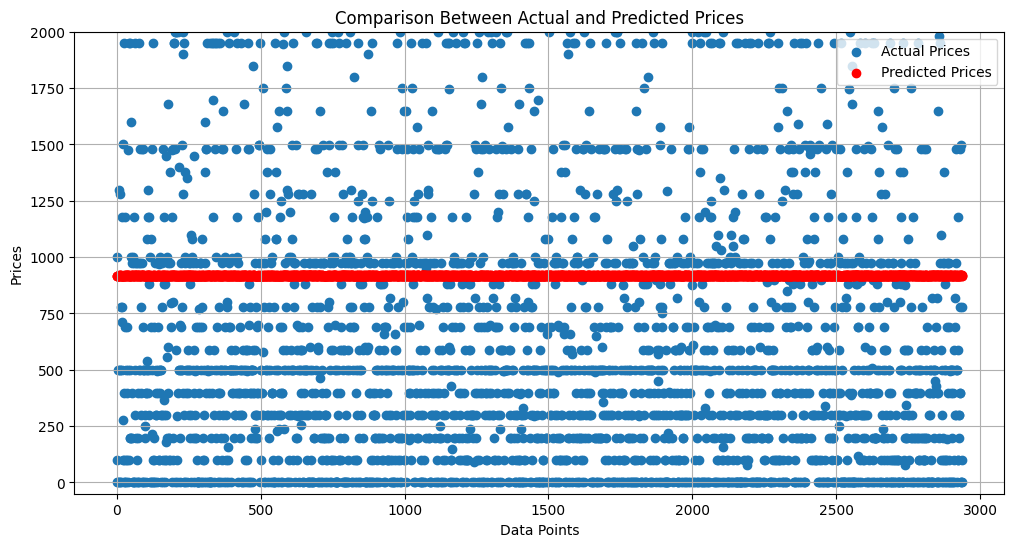

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'actual_prices' is a list or array containing the actual prices
plt.figure(figsize=(12, 6))
plt.scatter(range(len(compiled_df['price'])), compiled_df['price'], label="Actual Prices")
plt.scatter(range(len(compiled_df['average_predicted_price'])), compiled_df['average_predicted_price'], color="red", label="Predicted Prices")
plt.title("Comparison Between Actual and Predicted Prices")
plt.xlabel("Data Points")
plt.ylabel("Prices")
plt.ylim(-50,2000)
plt.legend()
plt.grid(True)
plt.show()

# Predict the price with binning

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import Sequence
import random
import math

In [ ]:
random.seed(45)

In [ ]:
import pandas as pd

games_df = pd.read_json("dataset.json")

games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14687 entries, 0 to 14686
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   appid        14687 non-null  object 
 1   release      14687 non-null  object 
 2   title        14687 non-null  object 
 3   price        14687 non-null  int64  
 4   sentiment    6904 non-null   object 
 5   reviews      6904 non-null   float64
 6   percentage   6904 non-null   float64
 7   tags         14687 non-null  object 
 8   screenshots  14687 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.0+ MB


In [ ]:
games_df

,appid,release,title,price,sentiment,reviews,percentage,tags,screenshots
0,2805630,2024-02-24,BotMobile,1173,Positive,10.0,100.0,"[Action, Action-Adventure, Adventure, Casual, ...",[2805630_ss_02b69bffacf19807fb6202fb8167fad7e0...
1,2805610,2024-02-24,Just skill shooter 3: 2d edition,199,Positive,11.0,90.0,"[2D, Action, Action RPG, Action-Adventure, Adv...",[2805610_ss_21f5dfd4d369f1cefdd9d233f574a4758d...
2,2816420,2024-02-24,Slime Drop,199,None,NaN,NaN,"[2D, Arcade, Casual, Clicker, Colorful, Cute, ...",[2816420_ss_649a6c5bb66b93bf7b0a384d412923618d...
3,2815670,2024-02-24,Path to the Creator,299,None,NaN,NaN,"[2D, Action RPG, Adventure, Character Customiz...",[2815670_ss_06c8a39fd0618390bdedaff037f2463ca4...
4,2776190,2024-02-24,Crowd Control VR,1179,None,NaN,NaN,"[360 Video, Arcade, Cartoony, Casual, Fantasy,...",[2776190_ss_01d6152f8e559e051312ea5e6232ba1ecb...
...,...,...,...,...,...,...,...,...,...
14682,2180890,2024-03-11,Bunny Game,498,None,NaN,NaN,"[3D, Action, Action-Adventure, Adventure, Casu...",[2180890_ss_65cce5286f5b640fce7205265a6d93849d...
14683,2782420,2024-03-11,Minimal Escape,589,None,NaN,NaN,"[2.5D, 2D, 2D Platformer, Adventure, Dark, Dar...",[2782420_ss_12214ad1e860f85e92db7a5a1bce3704e2...
14684,2836310,2024-03-11,Refrega,779,None,NaN,NaN,"[2D, Action, Action RTS, Action-Adventure, Bas...",[2836310_ss_44ad679065acaf830ac65462dc8680f694...
14685,2626240,2024-03-11,Saving Mrs. Hinako,1479,None,NaN,NaN,"[2D, Adventure, Anime, Casual, Colorful, Conve...",[2626240_ss_45a46df5dafe7c83e2094b47d6d3e2ac7d...


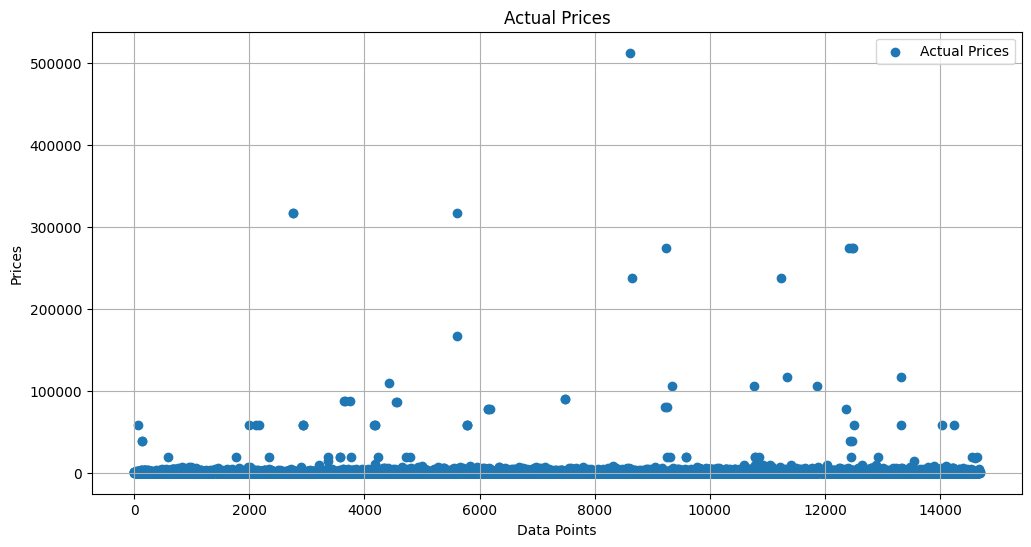

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'actual_prices' is a list or array containing the actual prices
plt.figure(figsize=(12, 6))
plt.scatter(range(len(games_df['price'])), games_df['price'], label="Actual Prices")

plt.title("Actual Prices")
plt.xlabel("Data Points")
plt.ylabel("Prices")
plt.legend()
plt.grid(True)
plt.show()

# Let us bin the games according to the nintendo eshop

In [ ]:
bin_edges = [0, 1, 1000, 2000, 3000, 5000, float('inf')]
labels = [
    "0,00 €",
    "0,01 € to 9,99 €",
    "10,00 € to 19,99 €",
    "20,00 € to 29,99 €",
    "30,00 € to 49,99 €",
    "> 50,00€",
]

games_df['price_range'] = pd.cut(
    games_df['price'],
    bins=bin_edges,
    labels=labels,
    right=False,
)

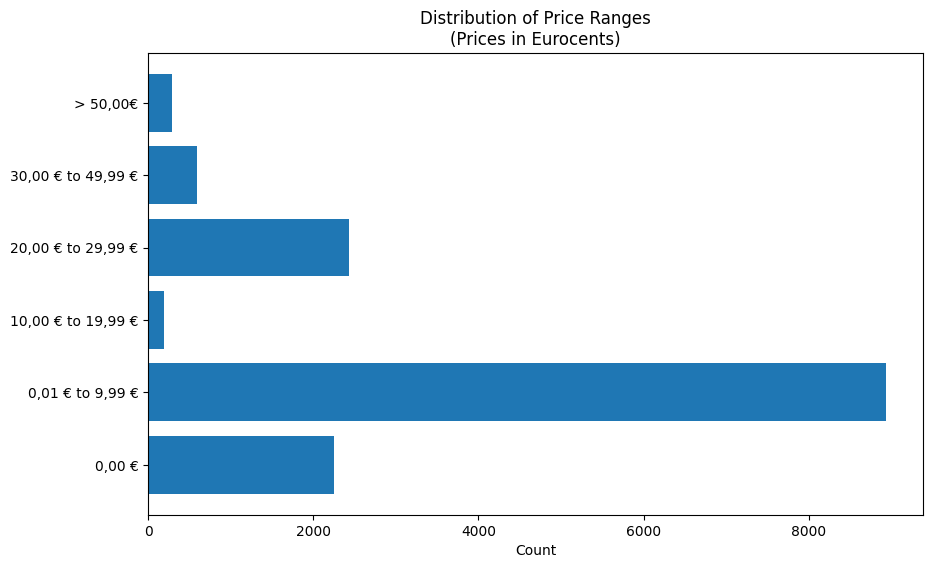

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
unique_prices = sorted(games_df["price_range"].unique(), key=lambda x: int(''.join(filter(str.isdigit, str(x)))) if isinstance(x, str) else x)
counts = games_df["price_range"].value_counts().reindex(unique_prices, fill_value=0)
plt.barh(np.arange(len(counts)), counts.values, align="center")
plt.xlabel("Count")
plt.title("Distribution of Price Ranges\n(Prices in Eurocents)")

category_names = counts.index.tolist()
category_names += [category_names.pop(2)]
plt.yticks(np.arange(len(counts)), category_names)
plt.show()

In [ ]:
games_df

,appid,release,title,price,sentiment,reviews,percentage,tags,screenshots,price_range
0,2805630,2024-02-24,BotMobile,1173,Positive,10.0,100.0,"[Action, Action-Adventure, Adventure, Casual, ...",[2805630_ss_02b69bffacf19807fb6202fb8167fad7e0...,"10,00 € to 19,99 €"
1,2805610,2024-02-24,Just skill shooter 3: 2d edition,199,Positive,11.0,90.0,"[2D, Action, Action RPG, Action-Adventure, Adv...",[2805610_ss_21f5dfd4d369f1cefdd9d233f574a4758d...,"0,01 € to 9,99 €"
2,2816420,2024-02-24,Slime Drop,199,None,NaN,NaN,"[2D, Arcade, Casual, Clicker, Colorful, Cute, ...",[2816420_ss_649a6c5bb66b93bf7b0a384d412923618d...,"0,01 € to 9,99 €"
3,2815670,2024-02-24,Path to the Creator,299,None,NaN,NaN,"[2D, Action RPG, Adventure, Character Customiz...",[2815670_ss_06c8a39fd0618390bdedaff037f2463ca4...,"0,01 € to 9,99 €"
4,2776190,2024-02-24,Crowd Control VR,1179,None,NaN,NaN,"[360 Video, Arcade, Cartoony, Casual, Fantasy,...",[2776190_ss_01d6152f8e559e051312ea5e6232ba1ecb...,"10,00 € to 19,99 €"
...,...,...,...,...,...,...,...,...,...,...
14682,2180890,2024-03-11,Bunny Game,498,None,NaN,NaN,"[3D, Action, Action-Adventure, Adventure, Casu...",[2180890_ss_65cce5286f5b640fce7205265a6d93849d...,"0,01 € to 9,99 €"
14683,2782420,2024-03-11,Minimal Escape,589,None,NaN,NaN,"[2.5D, 2D, 2D Platformer, Adventure, Dark, Dar...",[2782420_ss_12214ad1e860f85e92db7a5a1bce3704e2...,"0,01 € to 9,99 €"
14684,2836310,2024-03-11,Refrega,779,None,NaN,NaN,"[2D, Action, Action RTS, Action-Adventure, Bas...",[2836310_ss_44ad679065acaf830ac65462dc8680f694...,"0,01 € to 9,99 €"
14685,2626240,2024-03-11,Saving Mrs. Hinako,1479,None,NaN,NaN,"[2D, Adventure, Anime, Casual, Colorful, Conve...",[2626240_ss_45a46df5dafe7c83e2094b47d6d3e2ac7d...,"10,00 € to 19,99 €"


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(games_df, test_size=0.2)
train, val = train_test_split(train,test_size=0.2)

In [ ]:
import numpy as np
import pandas as pd

# Assuming train is your DataFrame

# Step 1: Compute Q1 and Q3
Q1 = train['price'].quantile(0.25)
Q3 = 100000

# Step 2: Compute IQR
IQR = Q3 - Q1

# Step 3: Set limits based on IQR
lower_limit = Q1 - 1.5 * IQR
upper_limit = 10000

# Step 4: Remove outliers
train_no_outliers = train[(train['price'] > lower_limit) & (train['price'] < upper_limit)]

In [ ]:
import pandas as pd

# Assuming df is your original dataframe
train_new = train_no_outliers.explode('screenshots')
indices = np.arange(len(train_new))
np.random.shuffle(indices)
train_new = train_new.iloc[indices].reset_index(drop=True)

val_new = val.explode('screenshots')
indices = np.arange(len(val_new))
np.random.shuffle(indices)
val_new = val_new.iloc[indices].reset_index(drop=True)

test_new = test.explode('screenshots')
indices = np.arange(len(test_new))
np.random.shuffle(indices)
test_new = test_new.iloc[indices].reset_index(drop=True)

train_new=train_new.reset_index()
val_new= val_new.reset_index()
test_new=test_new.reset_index()

In [ ]:
train_new

,index,appid,release,title,price,sentiment,reviews,percentage,tags,screenshots,price_range
0,0,1432410,2023-11-29,Shape Quiz,499,None,NaN,NaN,"[2D, Casual, Education, Indie, Puzzle, Singlep...",1432410_ss_635bb90e4d9d74e84e6eb7acd0f8ab63b9f...,"0,01 € to 9,99 €"
1,1,2283630,2023-12-03,No Water in Hell,779,None,NaN,NaN,"[1990's, 2D, Action, Action Roguelike, Combat,...",2283630_ss_e94765889b31804811a3b35472bb1e9b6d6...,"0,01 € to 9,99 €"
2,2,2421770,2023-05-27,DEMONIAC WORDS,199,None,NaN,NaN,"[3D, Adventure, Casual, Clicker, Conversation,...",2421770_ss_3472a511abe7a37d21286f35b7182fbff4b...,"0,01 € to 9,99 €"
3,3,2309530,2023-02-21,GRADIENT,499,None,NaN,NaN,"[3D, Action, Action-Adventure, Arena Shooter, ...",2309530_ss_f4cfc893763a3cacaff0dd4a961c2690f11...,"0,01 € to 9,99 €"
4,4,2690770,2023-12-07,Grandfather Simulator,199,Positive,21.0,90.0,"[1990's, 3D, 3D Fighter, 3D Platformer, Action...",2690770_ss_7b340bc141552cb1e0ab3a77801aaa80e05...,"0,01 € to 9,99 €"
...,...,...,...,...,...,...,...,...,...,...,...
82035,82035,2181940,2024-02-16,CivIdle,0,Mostly Positive,166.0,74.0,"[4X, Automation, Base Building, Building, Capi...",2181940_ss_ace423a4314eaea0a363e30f4cabe82063e...,"0,00 €"
82036,82036,2395450,2023-06-29,Re-Loaded,779,None,NaN,NaN,"[1990's, 2.5D, 3D, Action, Cartoony, Combat, C...",2395450_ss_7c99d37cbb7a08cd391d5853cd4af416bb0...,"0,01 € to 9,99 €"
82037,82037,1681510,2023-01-20,Trenches - World War 1 Horror Survival Game,819,Mostly Positive,92.0,75.0,"[3D, Action, Adventure, Atmospheric, Dark, Dem...",1681510_ss_6ac0f8f6c06b4e23e036ff581a576cb493e...,"0,01 € to 9,99 €"
82038,82038,1671480,2023-09-05,ABRISS - build to destroy,1999,Very Positive,353.0,86.0,"[3D, Abstract, Atmospheric, Building, Casual, ...",1671480_ss_40231d096d8f012f2ddb44e1b619c01ed7f...,"10,00 € to 19,99 €"


In [ ]:
from PIL import Image
import numpy as np

def webp_to_array(filename, target_shape=(160, 160)):
    """Converts a WebP image file to a numpy array."""
    try:
        # Attempt to open the file
        img = Image.open(filename).convert("RGB")
    except FileNotFoundError:
        print(f"Warning: Image file '{filename}' not found. Continuing without it.")
        return  # Return None to indicate that the image was not found
    except Exception as e:
        raise IOError(f"Failed to open {filename}: {str(e)}.")

    # Assert that the image was loaded properly
    assert isinstance(img, Image.Image), f"Failed to open {filename}. Please make sure the file exists and is accessible."

    # Resize the image
    img = img.resize(target_shape, resample=Image.BICUBIC)

    # Convert to a NumPy array
    img_arr = np.asarray(img)

    # Scale pixel values to [0, 1]
    img_arr = img_arr.astype(np.float32) / 255.0

    return img_arr

In [ ]:
import albumentations as A
from typing import Tuple
import tensorflow as tf
import numpy as np
from PIL import Image

def webp_generator(df, batch_size):
    num_samples = len(df)
    #price_ranges = {'0,00 €': 0, '0,01 € to 2,49 €': 1, '2,50 € to 4,99 €': 2, '5,00 € to 7,49 €': 3, '7,50 € to 9,99 €': 4, '10,00 € to 14,99 €': 5, '15,00 € to 19,99 €': 6, '20,00 € to 29,99 €': 7, '30,00 € to 49,99 €': 8, '> 50,00€': 9}
    price_ranges = {'0,00 €': 0, '0,01 € to 9,99 €': 1, '10,00 € to 19,99 €': 2, '20,00 € to 29,99 €': 3, '30,00 € to 49,99 €': 4, '> 50,00€': 5}
    while True:
        batch_images = []
        batch_targets = []
        for _ in range(batch_size):
            index = np.random.randint(num_samples)
            row = df.iloc[index]
            filename = 'images/' + row['screenshots']
            target = price_ranges[row['price_range']]
            try:
                arr = webp_to_array(filename, target_shape=(160, 160))
            except FileNotFoundError:
                print(f"Warning: Image file '{filename}' not found. Skipping.")
                continue  # Skip to the next iteration

            if not isinstance(arr, np.ndarray):
                print(f"Warning: Image file '{filename}' could not be loaded as a NumPy array. Skipping.")
                continue  # Skip to the next iteration

            batch_images.append(arr)
            batch_targets.append(target)

        if len(batch_images) < batch_size:
            continue

        yield np.array(batch_images), batch_targets



In [ ]:
channels=3
img_height=160
img_width=160
batch_size = 8
num_epochs=30



price_ranges = {'0,00 €': 0, '0,01 € to 9,99 €': 1, '10,00 € to 19,99 €': 2, '20,00 € to 29,99 €': 3, '30,00 € to 49,99 €': 4, '> 50,00€': 5}
train_ds = tf.data.Dataset.from_generator(
    lambda: webp_generator(train_new, batch_size),
    output_signature=(
        tf.TensorSpec(shape=(batch_size, img_height, img_width, channels), dtype=tf.float32),
        tf.TensorSpec(shape=(batch_size,), dtype=tf.float32)
    )
).prefetch(buffer_size=tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_generator(
    lambda: webp_generator(val_new, batch_size),
    output_signature=(
        tf.TensorSpec(shape=(batch_size, img_height, img_width, channels), dtype=tf.float32),
        tf.TensorSpec(shape=(batch_size,), dtype=tf.float32)
    )
).prefetch(buffer_size=tf.data.AUTOTUNE)




In [ ]:
for images, targets in train_ds:
    print('Shape of images: ', images.shape)
    print('Shape of targets: ', targets.shape)
    break

Shape of images:  (8, 160, 160, 3)
Shape of targets:  (8,)


## Basic Model

In [ ]:
num_classes = len(price_ranges)  # Total number of price ranges
inputs = tf.keras.layers.Input((img_height, img_width, channels))
x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="leaky_relu")(inputs)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(rate=0.5)(x)
outputs = tf.keras.layers.Dense(units=num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with the specified optimizer, loss, and metrics
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 158, 158, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 79, 79, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 399424)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 399424)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │     2,396,550 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,398,342 (9.15 MB)

 Trainable params: 2,398,342 (9.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_ds, epochs=num_epochs,verbose=True,steps_per_epoch=math.ceil(len(train_new)/(batch_size)))

Epoch 1/30
  823/10255 ━━━━━━━━━━━━━━━━━━━━ 25:38 163ms/step - accuracy: 0.4766 - loss: 1.8941Warning: Image file 'images/1029210_ss_7096afc94036153001b266a75253fb6abdd03c54.1920x1080.webp' not found. Continuing without it.
 8382/10255 ━━━━━━━━━━━━━━━━━━━━ 5:03 162ms/step - accuracy: 0.5200 - loss: 1.4569Warning: Image file 'images/1029210_ss_7096afc94036153001b266a75253fb6abdd03c54.1920x1080.webp' not found. Continuing without it.
10255/10255 ━━━━━━━━━━━━━━━━━━━━ 1666s 162ms/step - accuracy: 0.5239 - loss: 1.4411
Epoch 2/30
 1381/10255 ━━━━━━━━━━━━━━━━━━━━ 23:37 160ms/step - accuracy: 0.5808 - loss: 1.3210Warning: Image file 'images/1029210_ss_7096afc94036153001b266a75253fb6abdd03c54.1920x1080.webp' not found. Continuing without it.
10255/10255 ━━━━━━━━━━━━━━━━━━━━ 1651s 161ms/step - accuracy: 0.5882 - loss: 1.2993
Epoch 3/30
 4259/10255 ━━━━━━━━━━━━━━━━━━━━ 16:00 160ms/step - accuracy: 0.6111 - loss: 1.2786Warning: Image file 'images/1029210_ss_7096afc94036153001b266a75253fb6abdd03c5

In [ ]:
Y_pred = model.predict(test_ds,steps=math.ceil(len(test_new)/batch_size))
Y_pred

1980/3198 ━━━━━━━━━━━━━━━━━━━━ 3:09 155ms/stepWarning: Image file 'images/2445340_ss_fdbf4004c0087b96c3a8ebb1152179b3563d7091.1920x1080.webp' not found. Continuing without it.
3198/3198 ━━━━━━━━━━━━━━━━━━━━ 489s 153ms/step


array([[8.9595305e-06, 9.9994129e-01, 4.9703423e-05, 2.3650673e-10,
        4.4492444e-17, 5.0614915e-14],
       [8.9803104e-14, 7.0939673e-13, 9.9999994e-01, 2.5249920e-17,
        3.9648297e-25, 4.8529133e-13],
       [4.8696025e-09, 9.9998039e-01, 1.9532104e-05, 4.3190811e-15,
        3.4527209e-21, 1.3589752e-24],
       ...,
       [1.2362599e-05, 4.2590749e-05, 5.1351991e-02, 9.4858831e-01,
        4.5815354e-06, 1.2573786e-10],
       [9.9895877e-01, 2.6945875e-07, 1.0409129e-03, 4.6917481e-10,
        8.3989253e-17, 6.7383729e-28],
       [4.3072443e-02, 9.3392724e-01, 2.3000332e-02, 3.7430072e-12,
        1.2939926e-20, 2.1933359e-27]], dtype=float32)

In [ ]:
import numpy as np

predictions = np.array(Y_pred)  # Your model predictions go here

n_instances, n_classes = predictions.shape

most_likely_class = np.zeros(n_instances, dtype=int)
for i in range(n_instances):
    most_likely_class[i] = np.argmax(predictions[i])

print(most_likely_class)

[1 2 1 ... 3 0 1]


In [ ]:
import pandas as pd

#price_ranges = {'0,00 €': 0, '0,01 € to 2,49 €': 1, '2,50 € to 4,99 €': 2, '5,00 € to 7,49 €': 3, '7,50 € to 9,99 €': 4, '10,00 € to 14,99 €': 5, '15,00 € to 19,99 €': 6, '20,00 € to 29,99 €': 7, '30,00 € to 49,99 €': 8, '> 50,00€': 9}
price_ranges = {'0,00 €': 0, '0,01 € to 9,99 €': 1, '10,00 € to 19,99 €': 2, '20,00 € to 29,99 €': 3, '30,00 € to 49,99 €': 4, '> 50,00€': 5}
reverse_price_ranges = {v: k for k, v in price_ranges.items()}

series = pd.Series(most_likely_class.squeeze(), name='predicted price range')
compiled_df = test_new.assign(**{series.name: series})

# Calculate the mode without dropping duplicates yet
temp_series = compiled_df.groupby("appid")["predicted price range"].apply(lambda x: x.mode()[0]).reset_index(name='predicted price range')

# Apply replacement
compiled_df['predicted_price_range'] = compiled_df['predicted price range'].map(reverse_price_ranges)

# Drop the old column if necessary
compiled_df = compiled_df.drop(columns=['predicted price range'])

In [ ]:
compiled_df

,index,appid,release,title,price,sentiment,reviews,percentage,tags,screenshots,price_range,predicted_price_range
0,0,2281410,2024-02-06,River Town Factory,1479,Very Positive,844.0,90.0,"[2D, Alternate History, Automation, Base Build...",2281410_ss_22e1942bd283ae42bcfe76f62068e76b355...,"10,00 € to 19,99 €","0,01 € to 9,99 €"
1,1,251950,2017-09-05,WWII Online,0,Mixed,570.0,49.0,"[Action, Co-op, Early Access, FPS, First-Perso...",251950_ss_b89f06c6e8334e49b301b5569e29e0f34128...,"0,00 €","10,00 € to 19,99 €"
2,2,2320660,2023-03-28,1000 Man General,975,None,NaN,NaN,"[3D, Action, Action-Adventure, Atmospheric, Ch...",2320660_ss_3e5eb530094e4036d226d5c6652ff303838...,"0,01 € to 9,99 €","0,01 € to 9,99 €"
3,3,2845260,2024-03-06,100 March Cats,0,Very Positive,301.0,96.0,"[Cartoony, Casual, Cats, Collectathon, Cozy, C...",2845260_ss_d299eab667c15af1db3a7134f3ed121f5b9...,"0,00 €","10,00 € to 19,99 €"
4,4,2354120,2023-06-30,Mortanis Prisoners #1,1950,Mostly Positive,15.0,73.0,"[Action, Atmospheric, Combat, Controller, Earl...",2354120_ss_9a1df1ee7307f31e3b9990121d1ff0d6279...,"10,00 € to 19,99 €","10,00 € to 19,99 €"
...,...,...,...,...,...,...,...,...,...,...,...,...
25572,25572,2453980,2023-06-26,super world run - bosses,779,None,NaN,NaN,"[2D, 2D Fighter, Action, Action-Adventure, Adv...",2453980_ss_302f8843510afe484374c8c443e38f4adfa...,"0,01 € to 9,99 €","10,00 € to 19,99 €"
25573,25573,2165390,2024-02-04,Tales of Spark,1379,Very Positive,409.0,85.0,"[3D, Action, Action RPG, Adventure, Anime, Com...",2165390_ss_cd92919a4ab592ed6aa00e305a88788c278...,"10,00 € to 19,99 €","30,00 € to 49,99 €"
25574,25574,2502730,2023-08-04,Shin Galaxy - Engage,399,None,NaN,NaN,"[2D, Action, Action RPG, Arena Shooter, Bullet...",2502730_ss_f0a9be36e41d4c54c35b25658686c362880...,"0,01 € to 9,99 €","10,00 € to 19,99 €"
25575,25575,2255820,2023-02-20,Dawn Of Hell,199,None,NaN,NaN,"[3D, Action, Action-Adventure, Adventure, Atmo...",2255820_ss_b5791178e01c9f1f9619350631349f4306c...,"0,01 € to 9,99 €","0,01 € to 9,99 €"


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix


# Get the ground truth and predicted columns as arrays
ground_truth_labels = np.array(compiled_df['price_range'].astype('category').cat.codes)
predicted_labels = np.array(compiled_df['predicted_price_range'].astype('category').cat.codes)

# Check the overall performance
accuracy = accuracy_score(y_true=ground_truth_labels, y_pred=predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
class_names = sorted(compiled_df['price_range'].unique())
print("Classification Report\n---------------")
print(classification_report(ground_truth_labels, predicted_labels, target_names=class_names))

# Compute F1-Score per class
f1_scores = f1_score(y_true=ground_truth_labels, y_pred=predicted_labels, average=None)
for idx, f1 in enumerate(f1_scores):
    print(f"F1-Score for '{class_names[idx]}': {f1:.4f}")

# Show confusion matrix
cm = confusion_matrix(y_true=ground_truth_labels, y_pred=predicted_labels)
print("\nConfusion Matrix\n--------------")
print(cm)

Accuracy: 0.3905
Classification Report
---------------
                    precision    recall  f1-score   support

            0,00 €       0.14      0.09      0.11      3405
  0,01 € to 9,99 €       0.59      0.52      0.55     15048
10,00 € to 19,99 €       0.20      0.36      0.26      5112
20,00 € to 29,99 €       0.04      0.03      0.03      1130
30,00 € to 49,99 €       0.01      0.00      0.00       580
          > 50,00€       0.00      0.00      0.00       302

          accuracy                           0.39     25577
         macro avg       0.16      0.17      0.16     25577
      weighted avg       0.41      0.39      0.39     25577

F1-Score for '0,00 €': 0.1108
F1-Score for '0,01 € to 9,99 €': 0.5506
F1-Score for '10,00 € to 19,99 €': 0.2610
F1-Score for '20,00 € to 29,99 €': 0.0313
F1-Score for '30,00 € to 49,99 €': 0.0029
F1-Score for '> 50,00€': 0.0000

Confusion Matrix
--------------
[[ 315 1809 1162   98   16    5]
 [1327 7780 5396  472   65    8]
 [ 461 2606 186

## Simple Model

In [ ]:
num_classes = len(price_ranges)  # Total number of price ranges
inputs = tf.keras.layers.Input((img_height, img_width, channels))
x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="leaky_relu")(inputs)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="leaky_relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation="leaky_relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(rate=0.5)(x)
outputs = tf.keras.layers.Dense(units=num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with the specified optimizer, loss, and metrics
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 158, 158, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 79, 79, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 77, 77, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 38, 38, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 36, 36, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │        31,110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,990 (218.71 KB)

 Trainable params: 55,990 (218.71 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#from keras.callbacks import EarlyStopping
#early_stop = EarlyStopping(monitor='loss', patience=5, mode='min')

In [ ]:
history = model.fit(train_ds, epochs=num_epochs,verbose=True,steps_per_epoch=math.ceil(len(train_new)/(batch_size)))

Epoch 1/50
   99/10252 ━━━━━━━━━━━━━━━━━━━━ 28:21 168ms/step - accuracy: 0.5649 - loss: 1.3471Warning: Image file 'images/1029210_ss_ddf975e414f08a0bb419818d2cd94be4ebff6db9.1920x1080.webp' not found. Continuing without it.
  927/10252 ━━━━━━━━━━━━━━━━━━━━ 26:15 169ms/step - accuracy: 0.5847 - loss: 1.2343Warning: Image file 'images/1029210_ss_7096afc94036153001b266a75253fb6abdd03c54.1920x1080.webp' not found. Continuing without it.
 4433/10252 ━━━━━━━━━━━━━━━━━━━━ 16:05 166ms/step - accuracy: 0.5864 - loss: 1.2051Warning: Image file 'images/1029210_ss_ddf975e414f08a0bb419818d2cd94be4ebff6db9.1920x1080.webp' not found. Continuing without it.
 5002/10252 ━━━━━━━━━━━━━━━━━━━━ 14:30 166ms/step - accuracy: 0.5863 - loss: 1.2039Warning: Image file 'images/2445340_ss_fdbf4004c0087b96c3a8ebb1152179b3563d7091.1920x1080.webp' not found. Continuing without it.
 5359/10252 ━━━━━━━━━━━━━━━━━━━━ 13:31 166ms/step - accuracy: 0.5862 - loss: 1.2033Warning: Image file 'images/1029210_ss_ddf975e414f08a0

In [ ]:
Y_pred = model.predict(test_ds,steps=math.ceil(len(test_new)/batch_size))
Y_pred

3225/3225 ━━━━━━━━━━━━━━━━━━━━ 478s 148ms/step


array([[4.42315675e-02, 8.11756253e-01, 1.29803360e-01, 8.41857214e-03,
        3.61333857e-03, 2.17667432e-03],
       [1.33234546e-01, 5.73999763e-01, 1.72984242e-01, 8.53392556e-02,
        2.59167328e-02, 8.52549449e-03],
       [1.89184681e-01, 4.98954564e-01, 1.96021274e-01, 7.49179199e-02,
        2.82185450e-02, 1.27029475e-02],
       ...,
       [6.27322197e-02, 7.48510361e-01, 1.67571723e-01, 1.52718388e-02,
        5.53048123e-03, 3.83447652e-04],
       [1.76068604e-01, 5.50462425e-01, 1.64612457e-01, 8.26824009e-02,
        2.28756219e-02, 3.29845096e-03],
       [6.54524416e-02, 7.87810802e-01, 1.21803612e-01, 1.06991958e-02,
        9.92417056e-03, 4.30961140e-03]], dtype=float32)

In [ ]:
import numpy as np

predictions = np.array(Y_pred)  # Your model predictions go here

n_instances, n_classes = predictions.shape

most_likely_class = np.zeros(n_instances, dtype=int)
for i in range(n_instances):
    most_likely_class[i] = np.argmax(predictions[i])

print(most_likely_class)

[1 1 1 ... 1 1 1]


In [ ]:
import pandas as pd

#price_ranges = {'0,00 €': 0, '0,01 € to 2,49 €': 1, '2,50 € to 4,99 €': 2, '5,00 € to 7,49 €': 3, '7,50 € to 9,99 €': 4, '10,00 € to 14,99 €': 5, '15,00 € to 19,99 €': 6, '20,00 € to 29,99 €': 7, '30,00 € to 49,99 €': 8, '> 50,00€': 9}
price_ranges = {'0,00 €': 0, '0,01 € to 9,99 €': 1, '10,00 € to 19,99 €': 2, '20,00 € to 29,99 €': 3, '30,00 € to 49,99 €': 4, '> 50,00€': 5}
reverse_price_ranges = {v: k for k, v in price_ranges.items()}

series = pd.Series(most_likely_class.squeeze(), name='predicted price range')
compiled_df = test_new.assign(**{series.name: series})

# Calculate the mode without dropping duplicates yet
temp_series = compiled_df.groupby("appid")["predicted price range"].apply(lambda x: x.mode()[0]).reset_index(name='predicted price range')

# Apply replacement
compiled_df['predicted_price_range'] = compiled_df['predicted price range'].map(reverse_price_ranges)

# Drop the old column if necessary
compiled_df = compiled_df.drop(columns=['predicted price range'])

In [ ]:
compiled_df

,index,appid,release,title,price,sentiment,reviews,percentage,tags,screenshots,price_range,predicted_price_range
0,0,1801410,2023-03-28,Deadnaut: Signal Lost,1479,Very Positive,61.0,95.0,"[3D, Action, Atmospheric, Character Customizat...",1801410_ss_da952b6e35d88375da27526f0ad8abd1e4d...,"10,00 € to 19,99 €","0,01 € to 9,99 €"
1,1,2347210,2024-02-16,They Bite!,399,None,NaN,NaN,"[Action, Cartoony, Controller, Early Access, F...",2347210_ss_b89ab9c402d70b82040585baa135949ceb5...,"0,01 € to 9,99 €","0,01 € to 9,99 €"
2,2,2513180,2023-07-27,Fruitalistic!,299,None,NaN,NaN,"[2D, Casual, Cute, Funny, Physics, Puzzle, Sin...",2513180_ss_8da58d7b3e5517c7fa539454bd56d7919eb...,"0,01 € to 9,99 €","0,01 € to 9,99 €"
3,3,2339080,2023-10-12,Pigments,599,None,NaN,NaN,"[2D, Action, Arcade, Bullet Hell, Casual, Colo...",2339080_ss_3c2d4fde56e54f4971dca69b5cf6a04e5b9...,"0,01 € to 9,99 €","0,01 € to 9,99 €"
4,4,2558670,2023-09-24,Maze Shooter,217,None,NaN,NaN,"[Action, Adventure, Casual, Dungeon Crawler, F...",2558670_ss_b92ec1f4a3b2dc43b065ddbfa1d76721792...,"0,01 € to 9,99 €","0,01 € to 9,99 €"
...,...,...,...,...,...,...,...,...,...,...,...,...
25795,25795,2291190,2023-02-03,Doodle TD,99,None,NaN,NaN,"[2D, 2D Platformer, Action-Adventure, Arcade, ...",2291190_ss_c28e1e392c057c8689c6df8fd90a29e4301...,"0,01 € to 9,99 €","0,01 € to 9,99 €"
25796,25796,2528910,2023-09-01,Labyrinthum,589,None,NaN,NaN,"[3D, Adventure, Casual, Colorful, Early Access...",2528910_ss_e4ebacf29281d93be333ce7cd6623c86f68...,"0,01 € to 9,99 €","0,01 € to 9,99 €"
25797,25797,2264770,2023-10-10,Spellsphere,499,None,NaN,NaN,"[2D, 2D Platformer, Action, Action Roguelike, ...",2264770_ss_2a65cc66b5d0a30c10d3c286986604574f6...,"0,01 € to 9,99 €","0,01 € to 9,99 €"
25798,25798,1793150,2023-06-17,Doomer,399,Very Positive,67.0,83.0,"[1990's, 3D, 6DOF, Atmospheric, Capitalism, Co...",1793150_ss_7b3a0e341843ac87ce213783578c2ec4084...,"0,01 € to 9,99 €","0,01 € to 9,99 €"


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix


# Get the ground truth and predicted columns as arrays
ground_truth_labels = np.array(compiled_df['price_range'].astype('category').cat.codes)
predicted_labels = np.array(compiled_df['predicted_price_range'].astype('category').cat.codes)

# Check the overall performance
accuracy = accuracy_score(y_true=ground_truth_labels, y_pred=predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
class_names = sorted(compiled_df['price_range'].unique())
print("Classification Report\n---------------")
print(classification_report(ground_truth_labels, predicted_labels, target_names=class_names))

# Compute F1-Score per class
f1_scores = f1_score(y_true=ground_truth_labels, y_pred=predicted_labels, average=None)
for idx, f1 in enumerate(f1_scores):
    print(f"F1-Score for '{class_names[idx]}': {f1:.4f}")

# Show confusion matrix
cm = confusion_matrix(y_true=ground_truth_labels, y_pred=predicted_labels)
print("\nConfusion Matrix\n--------------")
print(cm)

Accuracy: 0.5560
Classification Report
---------------
                    precision    recall  f1-score   support

            0,00 €       0.13      0.01      0.01      3443
  0,01 € to 9,99 €       0.57      0.96      0.72     14748
10,00 € to 19,99 €       0.20      0.03      0.05      5555
20,00 € to 29,99 €       0.03      0.00      0.00      1257
30,00 € to 49,99 €       0.00      0.00      0.00       514
          > 50,00€       0.00      0.00      0.00       283

          accuracy                           0.56     25800
         macro avg       0.16      0.17      0.13     25800
      weighted avg       0.39      0.56      0.42     25800

F1-Score for '0,00 €': 0.0137
F1-Score for '0,01 € to 9,99 €': 0.7164
F1-Score for '10,00 € to 19,99 €': 0.0516
F1-Score for '20,00 € to 29,99 €': 0.0016
F1-Score for '30,00 € to 49,99 €': 0.0000
F1-Score for '> 50,00€': 0.0000

Confusion Matrix
--------------
[[   25  3306   107     4     0     1]
 [  106 14155   469    16     2     0]
 [ 

## More complicated Model

In [ ]:
num_classes = len(price_ranges)  # Total number of price ranges
def make_block(inputs, num_filters):
    x = tf.keras.layers.Conv2D(num_filters, kernel_size=(3, 3), padding="same", activation="relu")(inputs)
    x = tf.keras.layers.Conv2D(num_filters, kernel_size=(3, 3), padding="same", activation="relu")(x)
    return x

inputs = tf.keras.layers.Input((img_height, img_width, channels))

x = make_block(inputs, num_filters=32)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(rate=0.2)(x)

x = make_block(x, num_filters=16)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(rate=0.3)(x)

x = tf.keras.layers.GlobalMaxPooling2D()(x)
x = tf.keras.layers.Dropout(rate=0.5)(x)

outputs = tf.keras.layers.Dense(units=num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with the specified optimizer, loss, and metrics
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 160, 160, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 160, 160, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 80, 80, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 80, 80, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 40, 40, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 40, 40, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 16)             │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,190 (67.15 KB)

 Trainable params: 17,190 (67.15 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#from keras.callbacks import EarlyStopping
#early_stop = EarlyStopping(monitor='loss', patience=5, mode='min')

In [ ]:
history = model.fit(train_ds, epochs=num_epochs,verbose=True,steps_per_epoch=math.ceil(len(train_new)/(batch_size)))

Epoch 1/30
   88/10325 ━━━━━━━━━━━━━━━━━━━━ 39:56 234ms/step - accuracy: 0.4539 - loss: 1.5572Warning: Image file 'images/1029210_ss_ddf975e414f08a0bb419818d2cd94be4ebff6db9.1920x1080.webp' not found. Continuing without it.
  475/10325 ━━━━━━━━━━━━━━━━━━━━ 37:05 226ms/step - accuracy: 0.5154 - loss: 1.4419Warning: Image file 'images/1029210_ss_ddf975e414f08a0bb419818d2cd94be4ebff6db9.1920x1080.webp' not found. Continuing without it.
10325/10325 ━━━━━━━━━━━━━━━━━━━━ 2266s 219ms/step - accuracy: 0.5759 - loss: 1.2402
Epoch 2/30
 5974/10325 ━━━━━━━━━━━━━━━━━━━━ 15:39 216ms/step - accuracy: 0.5897 - loss: 1.1660Warning: Image file 'images/1029210_ss_ddf975e414f08a0bb419818d2cd94be4ebff6db9.1920x1080.webp' not found. Continuing without it.
10271/10325 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - accuracy: 0.5879 - loss: 1.1694Warning: Image file 'images/1029210_ss_ddf975e414f08a0bb419818d2cd94be4ebff6db9.1920x1080.webp' not found. Continuing without it.
10325/10325 ━━━━━━━━━━━━━━━━━━━━ 2224s 215ms

In [ ]:
Y_pred = model.predict(test_ds,steps=math.ceil(len(test_new)/batch_size))
Y_pred

3194/3194 ━━━━━━━━━━━━━━━━━━━━ 474s 148ms/step


array([[0.13707635, 0.58557326, 0.1983453 , 0.04928003, 0.02297588,
        0.0067492 ],
       [0.13625622, 0.5694486 , 0.20182475, 0.0569504 , 0.02745194,
        0.00806822],
       [0.13402247, 0.55633277, 0.20651315, 0.06255911, 0.03021342,
        0.0103591 ],
       ...,
       [0.13417073, 0.5565358 , 0.20652208, 0.06241503, 0.03002834,
        0.01032809],
       [0.13538001, 0.567753  , 0.20440492, 0.05699795, 0.02656773,
        0.00889634],
       [0.13476992, 0.55835253, 0.20576209, 0.06160739, 0.02959571,
        0.00991233]], dtype=float32)

In [ ]:
import numpy as np

predictions = np.array(Y_pred)  # Your model predictions go here

n_instances, n_classes = predictions.shape

most_likely_class = np.zeros(n_instances, dtype=int)
for i in range(n_instances):
    most_likely_class[i] = np.argmax(predictions[i])

print(most_likely_class)

[1 1 1 ... 1 1 1]


In [ ]:
import pandas as pd

#price_ranges = {'0,00 €': 0, '0,01 € to 2,49 €': 1, '2,50 € to 4,99 €': 2, '5,00 € to 7,49 €': 3, '7,50 € to 9,99 €': 4, '10,00 € to 14,99 €': 5, '15,00 € to 19,99 €': 6, '20,00 € to 29,99 €': 7, '30,00 € to 49,99 €': 8, '> 50,00€': 9}
price_ranges = {'0,00 €': 0, '0,01 € to 9,99 €': 1, '10,00 € to 19,99 €': 2, '20,00 € to 29,99 €': 3, '30,00 € to 49,99 €': 4, '> 50,00€': 5}
reverse_price_ranges = {v: k for k, v in price_ranges.items()}

series = pd.Series(most_likely_class.squeeze(), name='predicted price range')
compiled_df = val_new.assign(**{series.name: series})

# Calculate the mode without dropping duplicates yet
temp_series = compiled_df.groupby("appid")["predicted price range"].apply(lambda x: x.mode()[0]).reset_index(name='predicted price range')

# Apply replacement
compiled_df['predicted_price_range'] = compiled_df['predicted price range'].map(reverse_price_ranges)

# Drop the old column if necessary
compiled_df = compiled_df.drop(columns=['predicted price range'])

In [ ]:
compiled_df

,index,appid,release,title,price,sentiment,reviews,percentage,tags,screenshots,price_range,predicted_price_range
0,0,2279580,2023-09-07,Red Crucible Tanks,0,Mixed,29.0,58.0,"[3D, Action, Cold War, Colorful, Combat, Comic...",2279580_ss_24b5a48ee7e4cea5609f53612c42874687a...,"0,00 €","0,01 € to 9,99 €"
1,1,2085040,2023-04-06,ToriDori,499,Very Positive,101.0,94.0,"[3D, Adventure, Casual, Creature Collector, Cu...",2085040_ss_a67e08661a782931af496bfb4195a61513b...,"0,01 € to 9,99 €","0,01 € to 9,99 €"
2,2,2605260,2023-10-13,The Chad,0,Positive,27.0,88.0,"[3D, 3D Fighter, Action, Action-Adventure, Adv...",2605260_ss_9564b65026ddd9e7c996b93fffdceca0c35...,"0,00 €","0,01 € to 9,99 €"
3,3,1800480,2023-02-20,Defend from Candyland!,779,None,NaN,NaN,"[2D, Base Building, Building, Casual, Clicker,...",1800480_ss_126f68910e56b8cd527c2ea137c9f658f55...,"0,01 € to 9,99 €","0,01 € to 9,99 €"
4,4,2205850,2023-08-16,"Dwarves: Glory, Death and Loot",1378,Mostly Positive,847.0,77.0,"[Auto Battler, Casual, Character Customization...",2205850_ss_319a9ad0a94d9dc17f3ce109230350898c8...,"10,00 € to 19,99 €","0,01 € to 9,99 €"
...,...,...,...,...,...,...,...,...,...,...,...,...
20144,20144,2255550,2023-06-14,Taxi Copter,0,Mixed,10.0,60.0,"[2D, 2D Platformer, Action, Arcade, Atmospheri...",2255550_ss_8f9e1090fee884985630cc13fd77dd3db47...,"0,00 €","0,01 € to 9,99 €"
20145,20145,1555140,2023-12-05,Born of Bread,2499,Mostly Positive,203.0,79.0,"[2.5D, 2D, 3D, 3D Platformer, Adventure, Carto...",1555140_ss_d749860ccd558006da647dcd82a5929e3a0...,"20,00 € to 29,99 €","0,01 € to 9,99 €"
20146,20146,2853790,2024-03-09,Wyvern Studios Solitaire: 30th Aniversary Edition,0,None,NaN,NaN,"[1990's, 3D, Atmospheric, Card Game, Casual, C...",2853790_ss_724a48b705c7420beab2551745975913a36...,"0,00 €","0,01 € to 9,99 €"
20147,20147,2172030,2023-02-24,Elong Plug,0,Very Positive,317.0,98.0,"[3D Platformer, Adventure, Atmospheric, Casual...",2172030_ss_3902d6f6b11db5c557dab437e7c36d29dbd...,"0,00 €","0,01 € to 9,99 €"


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix


# Get the ground truth and predicted columns as arrays
ground_truth_labels = np.array(compiled_df['price_range'].astype('category').cat.codes)
predicted_labels = np.array(compiled_df['predicted_price_range'].astype('category').cat.codes)

# Check the overall performance
accuracy = accuracy_score(y_true=ground_truth_labels, y_pred=predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
class_names = sorted(compiled_df['price_range'].unique())
print("Classification Report\n---------------")
print(classification_report(ground_truth_labels, predicted_labels, target_names=class_names))

# Compute F1-Score per class
f1_scores = f1_score(y_true=ground_truth_labels, y_pred=predicted_labels, average=None)
for idx, f1 in enumerate(f1_scores):
    print(f"F1-Score for '{class_names[idx]}': {f1:.4f}")

# Show confusion matrix
cm = confusion_matrix(y_true=ground_truth_labels, y_pred=predicted_labels)
print("\nConfusion Matrix\n--------------")
print(cm)

Accuracy: 0.1411
Classification Report
---------------
                    precision    recall  f1-score   support

            0,00 €       0.14      1.00      0.25      2843
  0,01 € to 9,99 €       0.00      0.00      0.00     11529
10,00 € to 19,99 €       0.00      0.00      0.00      4053
20,00 € to 29,99 €       0.00      0.00      0.00       938
30,00 € to 49,99 €       0.00      0.00      0.00       479
          > 50,00€       0.00      0.00      0.00       307

          accuracy                           0.14     20149
         macro avg       0.02      0.17      0.04     20149
      weighted avg       0.02      0.14      0.03     20149

F1-Score for '0,00 €': 0.2473
F1-Score for '0,01 € to 9,99 €': 0.0000
F1-Score for '10,00 € to 19,99 €': 0.0000
F1-Score for '20,00 € to 29,99 €': 0.0000
F1-Score for '30,00 € to 49,99 €': 0.0000
F1-Score for '> 50,00€': 0.0000

Confusion Matrix
--------------
[[ 2843     0     0     0     0     0]
 [11529     0     0     0     0     0]
 [ 

/opt/zahratrain/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/zahratrain/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/zahratrain/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Efficient Net

In [ ]:
num_classes = len(price_ranges)  # Total number of price ranges
channels=3
img_height=160
img_width=160
batch_size = 8
num_epochs=30

# Specify the local path to the EfficientNetB4 weights file
local_weights_file = 'efficientnetb4_notop.h5'

# Load the EfficientNetB4 model from the local weights file
base_model = tf.keras.applications.EfficientNetB4(include_top=False, weights=None)
base_model.load_weights(local_weights_file)

# Freeze pre-trained layers
base_model.trainable = False

# Construct the model
inputs = tf.keras.layers.Input(shape=(img_height, img_width, channels))
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with the specified optimizer, loss, and metrics
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb4 (Functional)     │ (None, 5, 5, 1792)     │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1792)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │        10,758 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,684,581 (67.46 MB)

 Trainable params: 10,758 (42.02 KB)

 Non-trainable params: 17,673,823 (67.42 MB)

In [ ]:
history = model.fit(train_ds, epochs=num_epochs,verbose=True,steps_per_epoch=math.ceil(len(train_new)/(batch_size)))

Epoch 1/30
   68/10272 ━━━━━━━━━━━━━━━━━━━━ 42:14 248ms/step - accuracy: 0.5492 - loss: 1.3452Warning: Image file 'images/2445340_ss_fdbf4004c0087b96c3a8ebb1152179b3563d7091.1920x1080.webp' not found. Continuing without it.
  123/10272 ━━━━━━━━━━━━━━━━━━━━ 42:47 253ms/step - accuracy: 0.5596 - loss: 1.3008Warning: Image file 'images/2445340_ss_fdbf4004c0087b96c3a8ebb1152179b3563d7091.1920x1080.webp' not found. Continuing without it.
 3802/10272 ━━━━━━━━━━━━━━━━━━━━ 26:36 247ms/step - accuracy: 0.5817 - loss: 1.2326Warning: Image file 'images/2445340_ss_fdbf4004c0087b96c3a8ebb1152179b3563d7091.1920x1080.webp' not found. Continuing without it.
 6054/10272 ━━━━━━━━━━━━━━━━━━━━ 17:21 247ms/step - accuracy: 0.5813 - loss: 1.2306Warning: Image file 'images/2445340_ss_fdbf4004c0087b96c3a8ebb1152179b3563d7091.1920x1080.webp' not found. Continuing without it.
 7866/10272 ━━━━━━━━━━━━━━━━━━━━ 9:54 247ms/step - accuracy: 0.5811 - loss: 1.2303Warning: Image file 'images/1029210_ss_7096afc940361530

In [ ]:
Y_pred = model.predict(test_ds,steps=math.ceil(len(test_new)/batch_size))
Y_pred

3204/3204 ━━━━━━━━━━━━━━━━━━━━ 768s 238ms/step


array([[0.1051667 , 0.62515056, 0.20725432, 0.02896597, 0.02834467,
        0.00511773],
       [0.1051298 , 0.6252019 , 0.20726502, 0.0289356 , 0.02834256,
        0.00512506],
       [0.1051024 , 0.6252429 , 0.2071881 , 0.02892382, 0.02840504,
        0.00513775],
       ...,
       [0.10528006, 0.62492627, 0.20739464, 0.02892235, 0.02836408,
        0.00511256],
       [0.10511313, 0.6252244 , 0.20722188, 0.0289616 , 0.028359  ,
        0.00512   ],
       [0.10518337, 0.62510663, 0.20726506, 0.02896305, 0.02836626,
        0.00511566]], dtype=float32)

In [ ]:
import numpy as np

predictions = np.array(Y_pred)  # Your model predictions go here

n_instances, n_classes = predictions.shape

most_likely_class = np.zeros(n_instances, dtype=int)
for i in range(n_instances):
    most_likely_class[i] = np.argmax(predictions[i])

print(most_likely_class)

[1 1 1 ... 1 1 1]


In [ ]:
import pandas as pd

#price_ranges = {'0,00 €': 0, '0,01 € to 2,49 €': 1, '2,50 € to 4,99 €': 2, '5,00 € to 7,49 €': 3, '7,50 € to 9,99 €': 4, '10,00 € to 14,99 €': 5, '15,00 € to 19,99 €': 6, '20,00 € to 29,99 €': 7, '30,00 € to 49,99 €': 8, '> 50,00€': 9}
price_ranges = {'0,00 €': 0, '0,01 € to 9,99 €': 1, '10,00 € to 19,99 €': 2, '20,00 € to 29,99 €': 3, '30,00 € to 49,99 €': 4, '> 50,00€': 5}
reverse_price_ranges = {v: k for k, v in price_ranges.items()}

series = pd.Series(most_likely_class.squeeze(), name='predicted price range')
compiled_df = test_new.assign(**{series.name: series})

# Calculate the mode without dropping duplicates yet
temp_series = compiled_df.groupby("appid")["predicted price range"].apply(lambda x: x.mode()[0]).reset_index(name='predicted price range')

# Apply replacement
compiled_df['predicted_price_range'] = compiled_df['predicted price range'].map(reverse_price_ranges)

# Drop the old column if necessary
compiled_df = compiled_df.drop(columns=['predicted price range'])

In [ ]:
compiled_df

,index,appid,release,title,price,sentiment,reviews,percentage,tags,screenshots,price_range,predicted_price_range
0,0,2438170,2023-07-27,SIZIF,99,None,NaN,NaN,"[3D, 3D Platformer, Abstract, Action, Arcade, ...",2438170_ss_ad5e95d4bdf6df263231c518ef0caf09a8b...,"0,01 € to 9,99 €","0,01 € to 9,99 €"
1,1,2826410,2024-02-23,Pinbot,2450,None,NaN,NaN,"[3D, Action, Action RTS, Arcade, Destruction, ...",2826410_ss_d0f99999a24940b005faec058d5cd6afaf9...,"20,00 € to 29,99 €","0,01 € to 9,99 €"
2,2,1272010,2023-12-06,Destroyer: The U-Boat Hunter,2998,Mostly Positive,554.0,77.0,"[3D, Action, Combat, Dynamic Narration, Histor...",1272010_ss_dd35377ed23f759a81c568fc277a94797f2...,"20,00 € to 29,99 €","0,01 € to 9,99 €"
3,3,2422910,2023-09-09,Love Quest VR: Los Angeles,499,Positive,20.0,90.0,"[6DOF, Adventure, Casual, Choices Matter, Choo...",2422910_ss_0f8c873a3d975d33cc5e1754c8a642b64e4...,"0,01 € to 9,99 €","0,01 € to 9,99 €"
4,4,2542800,2023-09-22,Upload Simulator Silicon,399,Mixed,22.0,68.0,"[2D, Atmospheric, Casual, Clicker, Crafting, F...",2542800_ss_a1975f8bcf69e8fd391da334160234dcab1...,"0,01 € to 9,99 €","0,01 € to 9,99 €"
...,...,...,...,...,...,...,...,...,...,...,...,...
25623,25623,2369250,2023-05-11,Little Army,399,None,NaN,NaN,"[2D, Arcade, Auto Battler, Cartoony, Casual, C...",2369250_ss_286635cde18969b8d8bad91ce6334257cb0...,"0,01 € to 9,99 €","0,01 € to 9,99 €"
25624,25624,2622770,2023-11-10,In Fair Spirits,879,None,NaN,NaN,"[Anime, Casual, Cute, Drama, Emotional, Indie,...",2622770_ss_7f30b4924d58e0c373120b0314f15714f53...,"0,01 € to 9,99 €","0,01 € to 9,99 €"
25625,25625,2299920,2023-03-03,CARTOONITE,499,Positive,14.0,85.0,"[3D, Arcade, Building, Colorful, Crafting, Dri...",2299920_ss_068a09669ef97ddb9c79c2ca29ef7945dcc...,"0,01 € to 9,99 €","0,01 € to 9,99 €"
25626,25626,2396380,2023-05-25,黑暗塔 (The Dark Tower),99,Positive,17.0,82.0,"[3D, 3D Vision, Adventure, Casual, Dark, Dark ...",2396380_ss_632c4046f7a8a4b9bb703edfb8ebdc743ce...,"0,01 € to 9,99 €","0,01 € to 9,99 €"


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix


# Get the ground truth and predicted columns as arrays
ground_truth_labels = np.array(compiled_df['price_range'].astype('category').cat.codes)
predicted_labels = np.array(compiled_df['predicted_price_range'].astype('category').cat.codes)

# Check the overall performance
accuracy = accuracy_score(y_true=ground_truth_labels, y_pred=predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
class_names = sorted(compiled_df['price_range'].unique())
print("Classification Report\n---------------")
print(classification_report(ground_truth_labels, predicted_labels, target_names=class_names))

# Compute F1-Score per class
f1_scores = f1_score(y_true=ground_truth_labels, y_pred=predicted_labels, average=None)
for idx, f1 in enumerate(f1_scores):
    print(f"F1-Score for '{class_names[idx]}': {f1:.4f}")

# Show confusion matrix
cm = confusion_matrix(y_true=ground_truth_labels, y_pred=predicted_labels)
print("\nConfusion Matrix\n--------------")
print(cm)

Accuracy: 0.1448
Classification Report
---------------
                    precision    recall  f1-score   support

            0,00 €       0.14      1.00      0.25      3712
  0,01 € to 9,99 €       0.00      0.00      0.00     14357
10,00 € to 19,99 €       0.00      0.00      0.00      5523
20,00 € to 29,99 €       0.00      0.00      0.00      1315
30,00 € to 49,99 €       0.00      0.00      0.00       436
          > 50,00€       0.00      0.00      0.00       285

          accuracy                           0.14     25628
         macro avg       0.02      0.17      0.04     25628
      weighted avg       0.02      0.14      0.04     25628

F1-Score for '0,00 €': 0.2530
F1-Score for '0,01 € to 9,99 €': 0.0000
F1-Score for '10,00 € to 19,99 €': 0.0000
F1-Score for '20,00 € to 29,99 €': 0.0000
F1-Score for '30,00 € to 49,99 €': 0.0000
F1-Score for '> 50,00€': 0.0000

Confusion Matrix
--------------
[[ 3712     0     0     0     0     0]
 [14357     0     0     0     0     0]
 [ 

/opt/zahratrain/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/zahratrain/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/zahratrain/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
